In [94]:
import pandas as pd
import scipy
import seaborn as sns
import os

In [75]:
def get_filtered_df(data_dir, part, cell_nums, set_num):
    df = pd.DataFrame({})
    for i, file_name in enumerate(os.listdir(data_dir)):
        file_path = data_dir+"\\"+file_name
        if file_name.__contains__(part):
            current_num = file_name.split('_')[0]
            if any(current_num == num for num in cell_nums):
                actin_df = pd.read_csv(file_path)
                # filter df based on actin length. For that analysis we use >= 1 um
                actin_df["cell num"] = file_name.split('_')[0]
                actin_df["set num"] = set_num
                actin_df["part"] = part
                actin_df = actin_df.loc[actin_df['Actin Length'] >= 1]
                df = df.append(actin_df)
    return df


## Control Data Set

In [82]:
cnt_df = pd.DataFrame({})

# First Control data set
data_dir_cnt_set1 = r"D:\BioLab\Current_experiments\afilament\2022.01.15_KASH_leica_cells_stat\Control\2022.01.25_KASH_cnt_analysis_data\actin_stat"
Cell_num_cnt_set1 = ["1", "2", "3", "4", "6", "7", "8", "9", "11", "12", "16"]

# Second Control data set
data_dir_cnt_set2 = r"D:\BioLab\Current_experiments\afilament\2022.01.15_KASH_leica_cells_stat\Control\2022.01.28_KASH_cnt_2set_0-8_cells_analysis_data\analysis_data\actin_stat"
Cell_num_cnt_set2 = ["1", "2", "3", "4", "5", "6", "7", "8"]
cnt_df

""


#### Actin cap statistics

In [83]:
cnt_cap_set1_df = get_filtered_df(data_dir_cnt_set1, "cap", Cell_num_cnt_set1, 1)
cnt_cap_set2_df = get_filtered_df(data_dir_cnt_set2, "cap", Cell_num_cnt_set2, 2)

# Combine two data sets
cnt_cap_df = cnt_cap_set1_df.append(cnt_cap_set2_df)
cnt_df = cnt_df.append(cnt_cap_df)

#### Actin bottom statistics

In [85]:
cnt_bottom_set1_df = get_filtered_df(data_dir_cnt_set1, "bottom", Cell_num_cnt_set1, 1)
cnt_bottom_set2_df = get_filtered_df(data_dir_cnt_set2, "bottom", Cell_num_cnt_set2, 2)

# Combine two data sets
cnt_bottom_df = cnt_bottom_set1_df.append(cnt_bottom_set2_df)

cnt_df = cnt_df.append(cnt_bottom_df)
cnt_df

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part
0,0,2.17634,0.017762,0.038656,38,0,NaN,NaN,11,1,cap
1,1,10.35232,0.117989,1.221459,177,0,NaN,NaN,11,1,cap
2,2,4.58796,0.086745,0.397981,79,0,NaN,NaN,11,1,cap
12,12,19.70470,0.130620,2.573824,336,0,NaN,NaN,11,1,cap
20,20,10.64642,0.128666,1.369827,182,0,NaN,NaN,11,1,cap
...,...,...,...,...,...,...,...,...,...,...,...
604,604,3.82330,0.096852,0.370296,66,0,NaN,NaN,8,2,bottom
634,634,4.29386,0.132631,0.569500,74,0,NaN,NaN,8,2,bottom
659,659,2.70572,0.079745,0.215767,47,0,NaN,NaN,8,2,bottom
678,678,2.70572,0.084813,0.229481,47,0,NaN,NaN,8,2,bottom


#### Actin whole cells statistics

In [86]:
cnt_cell_set1_df = get_filtered_df(data_dir_cnt_set1, "cell", Cell_num_cnt_set1, 1)
cnt_cell_set2_df = get_filtered_df(data_dir_cnt_set2, "cell", Cell_num_cnt_set2, 2)

# Combine two data sets
cnt_cell_df = cnt_cell_set1_df.append(cnt_cell_set2_df)

cnt_df = cnt_df.append(cnt_cell_df)
cnt_df

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part
0,0,2.17634,0.017762,0.038656,38,0,NaN,NaN,11,1,cap
1,1,10.35232,0.117989,1.221459,177,0,NaN,NaN,11,1,cap
2,2,4.58796,0.086745,0.397981,79,0,NaN,NaN,11,1,cap
12,12,19.70470,0.130620,2.573824,336,0,NaN,NaN,11,1,cap
20,20,10.64642,0.128666,1.369827,182,0,NaN,NaN,11,1,cap
...,...,...,...,...,...,...,...,...,...,...,...
173,1159,1.05876,0.091527,0.096905,19,0,NaN,NaN,8,2,cell
174,1454,1.05876,0.042629,0.045134,19,0,NaN,NaN,8,2,cell
175,1481,1.05876,0.043883,0.046461,19,0,NaN,NaN,8,2,cell
176,1608,1.05876,0.030927,0.032744,19,0,NaN,NaN,8,2,cell


## Doc Data Set

In [87]:
dox_df = pd.DataFrame({})

# Combined Doc data set
data_dir_doc = r"D:\BioLab\Current_experiments\afilament\2022.01.15_KASH_leica_cells_stat\Doxycycline\actin_stat_set2_combined"
Cell_num_doc = ["2", "3", "4", "5", "6", "7", "9", "10", "11", "12",
               "13", "14", "18", "19", "20", "18", "22", "24", "26"]

#### Actin cap statistics

In [89]:
dox_cap_df = get_filtered_df(data_dir_doc, "cap", Cell_num_doc, 1)

dox_df = dox_df.append(dox_cap_df)
dox_df

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part
1,1,1.05876,0.124544,0.131862,19,0,NaN,NaN,10,1,cap
2,2,2.29398,0.077620,0.178060,40,0,NaN,NaN,10,1,cap
4,4,3.82330,0.307161,1.174368,66,0,NaN,NaN,10,1,cap
5,5,1.05876,0.020479,0.021682,19,0,NaN,NaN,10,1,cap
6,6,11.46990,0.184216,2.112941,196,0,NaN,NaN,10,1,cap
...,...,...,...,...,...,...,...,...,...,...,...
344,344,1.11758,0.023425,0.026179,20,0,NaN,NaN,9,1,cap
359,359,2.05870,0.015881,0.032695,36,0,NaN,NaN,9,1,cap
363,363,1.41168,0.017470,0.024661,25,0,NaN,NaN,9,1,cap
364,364,2.23516,0.023008,0.051426,39,0,NaN,NaN,9,1,cap


#### Actin bottom statistics

In [90]:
dox_bottom_df = get_filtered_df(data_dir_doc, "bottom", Cell_num_doc, 1)

dox_df = dox_df.append(dox_bottom_df)
dox_df

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part
1,1,1.05876,0.124544,0.131862,19,0,NaN,NaN,10,1,cap
2,2,2.29398,0.077620,0.178060,40,0,NaN,NaN,10,1,cap
4,4,3.82330,0.307161,1.174368,66,0,NaN,NaN,10,1,cap
5,5,1.05876,0.020479,0.021682,19,0,NaN,NaN,10,1,cap
6,6,11.46990,0.184216,2.112941,196,0,NaN,NaN,10,1,cap
...,...,...,...,...,...,...,...,...,...,...,...
354,354,2.35280,0.018980,0.044657,41,0,NaN,NaN,9,1,bottom
382,382,4.41150,0.058719,0.259041,76,0,NaN,NaN,9,1,bottom
384,384,4.05858,0.097103,0.394102,70,0,NaN,NaN,9,1,bottom
399,399,2.52926,0.029778,0.075315,44,0,NaN,NaN,9,1,bottom


#### Actin whole cells statistics

In [91]:
dox_cell_df = get_filtered_df(data_dir_doc, "cell", Cell_num_doc, 1)

dox_df = dox_df.append(dox_cell_df)
dox_df

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part
1,1,1.05876,0.124544,0.131862,19,0,NaN,NaN,10,1,cap
2,2,2.29398,0.077620,0.178060,40,0,NaN,NaN,10,1,cap
4,4,3.82330,0.307161,1.174368,66,0,NaN,NaN,10,1,cap
5,5,1.05876,0.020479,0.021682,19,0,NaN,NaN,10,1,cap
6,6,11.46990,0.184216,2.112941,196,0,NaN,NaN,10,1,cap
...,...,...,...,...,...,...,...,...,...,...,...
103,525,1.11758,0.017073,0.019080,20,0,NaN,NaN,9,1,cell
104,112,1.05876,0.164665,0.174341,19,0,NaN,NaN,9,1,cell
105,149,1.05876,0.078989,0.083630,19,0,NaN,NaN,9,1,cell
106,246,1.05876,0.006687,0.007080,19,0,NaN,NaN,9,1,cell


## Combine contol and doc data


In [95]:
dox_df["treatment"] = "Doc"
cnt_df["treatment"] = "Cnt"

df_combined = dox_df.append(cnt_df)
df_combined

,ID,Actin Length,Actin Xsection,Actin Volume,Number of fiber layers,Max gap,Left node ID,Right node ID,cell num,set num,part,treatment
1,1,1.05876,0.124544,0.131862,19,0,NaN,NaN,10,1,cap,Doc
2,2,2.29398,0.077620,0.178060,40,0,NaN,NaN,10,1,cap,Doc
4,4,3.82330,0.307161,1.174368,66,0,NaN,NaN,10,1,cap,Doc
5,5,1.05876,0.020479,0.021682,19,0,NaN,NaN,10,1,cap,Doc
6,6,11.46990,0.184216,2.112941,196,0,NaN,NaN,10,1,cap,Doc
...,...,...,...,...,...,...,...,...,...,...,...,...
173,1159,1.05876,0.091527,0.096905,19,0,NaN,NaN,8,2,cell,Cnt
174,1454,1.05876,0.042629,0.045134,19,0,NaN,NaN,8,2,cell,Cnt
175,1481,1.05876,0.043883,0.046461,19,0,NaN,NaN,8,2,cell,Cnt
176,1608,1.05876,0.030927,0.032744,19,0,NaN,NaN,8,2,cell,Cnt


## Statistics and Figures

In [97]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

In [96]:
stat, pvalue = scipy.stats.ttest_ind(dox_cap_df["Actin Length"], cnt_cap_df["Actin Length"])
pvalue

0.0015148922142772304

<AxesSubplot:xlabel='treatment', ylabel='Actin Length'>

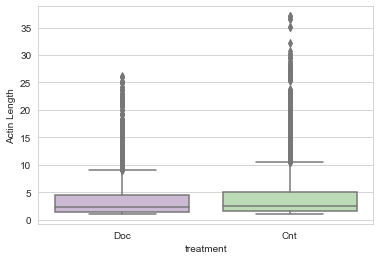

In [93]:
sns.boxplot(x="treatment", y="Actin Length", data=df_combined, palette="PRGn")

In [ ]:
pvalues = []
x_values = df["x_column"].unique()
parts = ["cap", "bottom", "cell"]
pvalues = []
for x in x_values:
    stat, pvalue = scipy.stats.ttest_ind(
        df[(df["x_column"] == x) & (df["hue_column"] == hue1)],
        df[(df["x_column"] == x) & (df["hue_column"] == hue2)]
    )